ESG 3.1 Filtered Structured Code

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your full dataset (replace with your actual file path)
df = pd.read_csv(r"C:\Users\alpes\OneDrive\Desktop\ESG Portfolio\ESG Data\ESGData.csv") 

In [11]:
df.shape           # Rows and columns
df.columns         # All column names
df.head()          # First 5 rows


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2050,Unnamed: 66
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN,NaN
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.641062,10.437876,6.277652,5.261868,6.385551,8.190277,NaN,NaN,NaN,NaN
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.055593,0.079402,0.086177,0.076670,0.085885,0.047916,NaN,NaN,NaN,NaN
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,27.835643,27.826564,27.845522,27.847925,27.866972,...,36.534503,36.607475,36.624759,36.610850,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['Indicator Name'].unique()[:10]   # First 10 indicators


array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       'Children in employment, total (% of children ages 7-14)'],
      dtype=object)

In [14]:
df['Country Name'].unique()[:10]     # First 10 countries


array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)'], dtype=object)

In [15]:
df.dtypes


Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2050              float64
Unnamed: 66       float64
Length: 67, dtype: object

In [16]:
df.groupby('Country Name')['Indicator Name'].nunique().sort_values(ascending=False)


Country Name
Afghanistan    67
Albania        67
Algeria        67
Andorra        67
Angola         67
               ..
Vietnam        67
World          67
Yemen, Rep.    67
Zambia         67
Zimbabwe       67
Name: Indicator Name, Length: 239, dtype: int64

In [17]:
years = [col for col in df.columns if col.isdigit()]
print("Year range:", min(years), "to", max(years))


Year range: 1960 to 2050


In [ ]:


# Define ESG indicator lists
env_indicators = [
    "CO2 emissions (metric tons per capita)",
    "Energy use (kg of oil equivalent per capita)",
    "Energy intensity level of primary energy (MJ/$2011 PPP GDP)",
    "Energy imports, net (% of energy use)",
    "Electricity production from coal sources (% of total)",
    "Access to clean fuels and technologies for cooking (% of population)",
    "Adjusted savings: natural resources depletion (% of GNI)",
    "Adjusted savings: net forest depletion (% of GNI)",
    "Agricultural land (% of land area)",
    "Annual freshwater withdrawals, total (% of internal resources)",
    "Cooling Degree Days (projected change in number of degree Celsius)",
    "Droughts, floods, extreme temperatures (% of population, average 1990-2009)",
    "Food production index (2004-2006 = 100)",
    "Forest area (% of land area)",
    "Fossil fuel energy consumption (% of total)",
    "GHG net emissions/removals by LUCF (Mt of CO2 equivalent)",
    "Terrestrial and marine protected areas (% of total territorial area)",
]

soc_indicators = [
    "Access to electricity (% of population)",
    "Annualized average growth rate in per capita real survey mean consumption or income, total population (%)",
    "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",
    "Children in employment, total (% of children ages 7-14)",
    "Fertility rate, total (births per woman)",
    "School enrollment, primary (% gross)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Unmet need for contraception (% of married women ages 15-49)",
    "Government expenditure on education, total (% of government expenditure)",
]

gov_indicators = [
    "Control of Corruption: Estimate",
    "Ease of doing business index (1=most business-friendly regulations)",
    "Government Effectiveness: Estimate",
    "Voice and Accountability: Estimate",
]

# Filter ESG DataFrames
env_df = df[df["Indicator Name"].isin(env_indicators)]
soc_df = df[df["Indicator Name"].isin(soc_indicators)]
gov_df = df[df["Indicator Name"].isin(gov_indicators)]

# Melt into long format
def reshape(df):
    df_long = df.melt(
        id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
        var_name="Year",
        value_name="Value"
    )
    df_long = df_long[df_long["Year"].str.match(r"^\d{4}$")]
    df_long["Year"] = df_long["Year"].astype(int)
    return df_long

env_long = reshape(env_df)
soc_long = reshape(soc_df)
gov_long = reshape(gov_df)

# Plotting function
def plot_trend(df, country, indicator):
    data = df[(df['Country Name'] == country) & (df['Indicator Name'] == indicator)]
    if data.empty:
        print(f"No data found for {country} - {indicator}")
        return
    data = data.set_index('Year')['Value'].sort_index()
    data.plot(title=f"{indicator} in {country}", marker='o')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


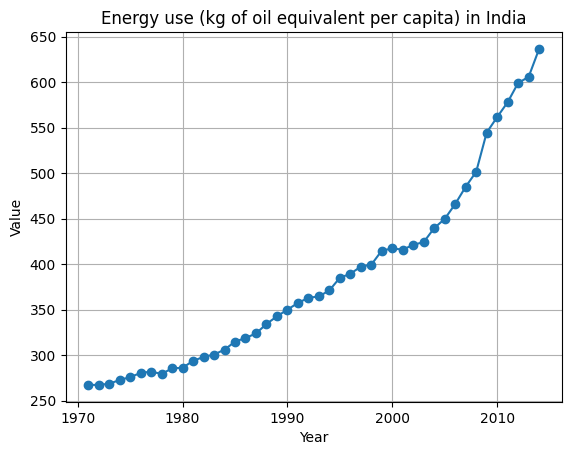

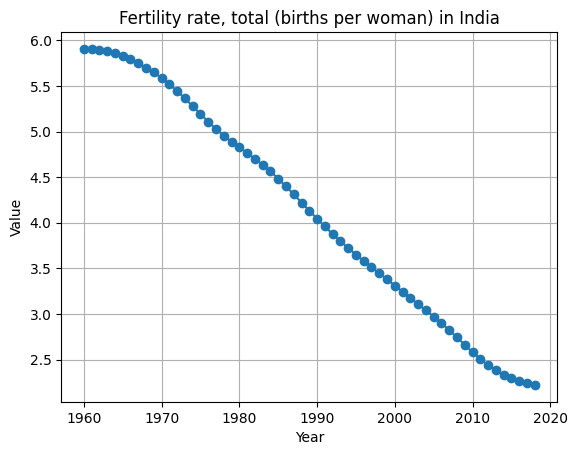

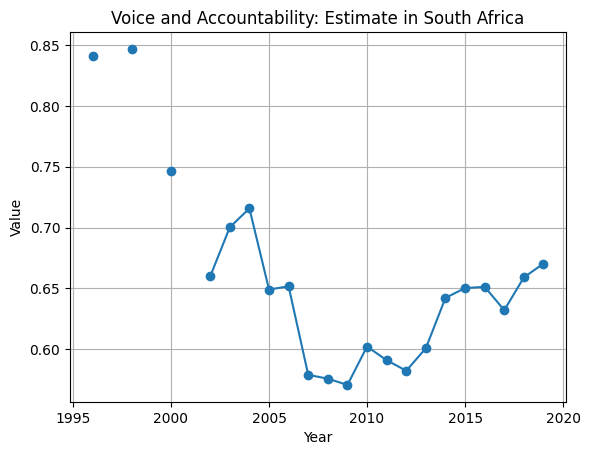

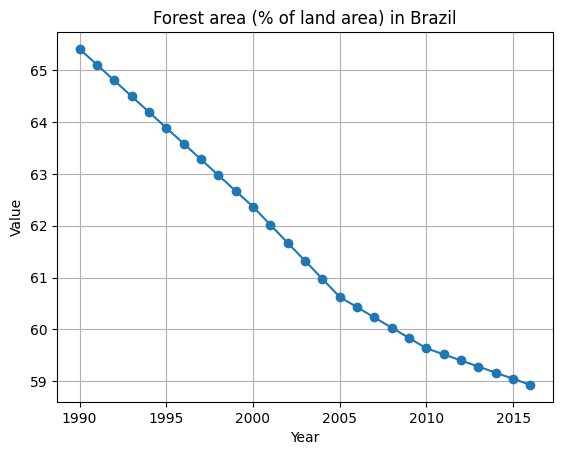

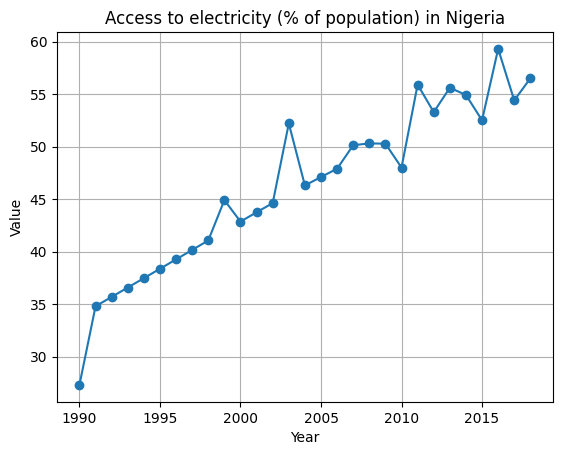

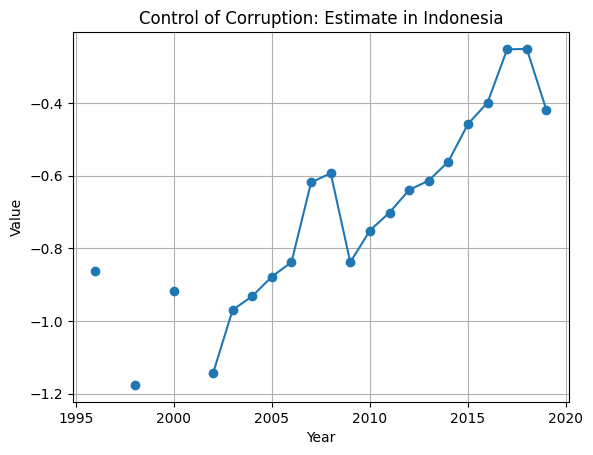

In [2]:
plot_trend(env_long, 'India', 'Energy use (kg of oil equivalent per capita)')
plot_trend(soc_long, 'India', 'Fertility rate, total (births per woman)')
plot_trend(gov_long, 'South Africa', 'Voice and Accountability: Estimate')
plot_trend(env_long, 'Brazil', 'Forest area (% of land area)')
plot_trend(soc_long, 'Nigeria', 'Access to electricity (% of population)')
plot_trend(gov_long, 'Indonesia', 'Control of Corruption: Estimate')


✅ Instruction Guide for Others to Try This Code
🔧 Use the Function:
plot_trend(dataset, 'Country Name', 'Indicator Name')

dataset: one of the following:

1.env_long (for Environment indicators)

2.soc_long (for Social indicators)

3.gov_long (for Governance indicators)

'Country Name': Any country from the list

'Indicator Name': One from the respective category


In [5]:
#📅 Available Years
env_long['Year'].unique()


array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2050])